## Simple Linear Regression_Ordinary Least Squares (OLS)


#### Q1 (2 points)  
In these exercises we'll be working with simple linear regression. Simple linear regression is an approach for predicting a response using only a single feature.

To create our model, we must “learn” or estimate the values of the regression coefficients $\hat{\beta}0$ and $\hat{\beta}1$. Once we’ve estimated these coefficients, we can use the model to predict responses. Here we are going to use the Least Squares technique as the cost function to estimate the coefficients.



In [91]:
import numpy as np 
def estimate_coef_OLS(X, y): 
    # x: np array of input with size n
    # y: np array of response/output with size n
    # return(B0, B1)
    ### YOUR CODE HERE ###
                # calculating regression coefficients(B0,B1)
    
    x_bar = np.mean(X)
    y_bar = np.mean(y)
    B1 = np.sum((X - x_bar)*(y - y_bar)) / np.sum(np.square(X - x_bar))
    B0 = y_bar - B1 * x_bar
    return(B0, B1) 


#### Q2 (4 points)  
Scikit-learn includes a number of dataset simulation functions, one of which is "make_regression ()". Importantly, we can create a dataset for regression that has both informative features and uninformative features, this makes for a good exercise in model selection.

In [92]:
import numpy as np 
from sklearn import linear_model, datasets
n_samples = 100
n_outliers = 5
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=2)
# Add outlier data
np.random.seed(1)
X[:n_outliers] = 15 + 0.7 * np.random.normal(size=(n_outliers, 1))

 a) Plot the data (X and y)
 
 b) Use your code from the previous part to find the linear model for this dataset.

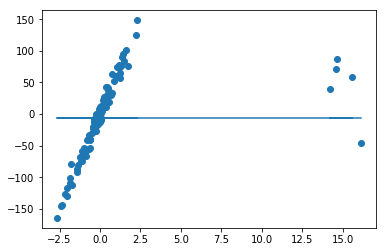

In [93]:
from matplotlib import pyplot as plt
%matplotlib inline
### YOUR CODE HERE ###
# use scatter plot to represent the dataset
plt.scatter(X, y)


# Plot the linear regression model that you found from Q1
(B0, B1) = estimate_coef_OLS(X, y)

predict = B1 * X + B0
plt.plot(X, predict)

c) Try to find the outliers in this dataset, 
Then remove outliers and find the new linear model for the remained data(without outliers)

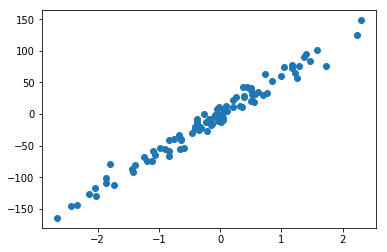

In [94]:

# Hint:you can use mean, variance or Z-score for each dimension to find outliers

Z = (X.T - np.mean(X))/np.std(X)

# use the argpartion function in numpy to find the largest Z score. 
# Doc: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
ind = np.argpartition(Z[0], -5)[-5:]
X = np.delete(X, ind)
y = np.delete(y, ind)
plt.scatter(X, y)



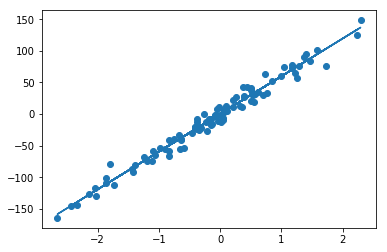

In [95]:
(B0, B1) = estimate_coef_OLS(X, y)

predict = B1 * X + B0
plt.scatter(X, y)
plt.plot(X, predict)

In [96]:
print('beta1 is: ' + str(B1))
print('beta0 is: ' + str(B0) )

beta1 is: 59.710321141542046
beta0 is: 0.28012252631957324


d) Use Statsmodel and Scikit-learn (OLS) and compare the result with part (c).

In [97]:
### YOUR CODE HERE ###
import statsmodels.api as sm
heights_constant_added = sm.add_constant(X)
results = sm.OLS(y, heights_constant_added).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3978.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           4.03e-78
Time:                        14:09:49   Log-Likelihood:                -347.48
No. Observations:                  95   AIC:                             699.0
Df Residuals:                      93   BIC:                             704.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2801      0.983      0.285      0.776      -1.671       2.231
x1            59.7103      0.947     63.071      0.000      57.830      61.590
==============================================================================
Omnibus:                        0.888   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.409
Skew:                           0.008   Prob(JB):                        0.815
Kurtosis:                       3.321   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
from sklearn.linear_model import LinearRegression
import pandas as pd
X_df = pd.DataFrame({'X': X})
# fit the model using the data
reg = LinearRegression().fit(X_df, y)
# print the coefficients
print('beta1 is: ' + str(reg.coef_[0]))
print('beta0 is: ' + str(reg.intercept_) )



beta1 is: 59.71032114154203
beta0 is: 0.28012252631957146


#### Q3 (4 points)
Kaggle is a competition platform for data scientists. In this class you will learn how to use the platform to practice data-science skills and "compete" with your classmates.

a) Reigster an account on [kaggle.com](https://www.kaggle.com) if you don't have one yet. Type in your kaggle profile name in the following block.

In [99]:
### What is your name on your Kaggle profile?

Chapman Data Mining

b) Use [this link](https://www.kaggle.com/t/58bf348e221f4a698c302663cd0e8f5e) to the competition page, and click on the top right button "Join Competition" to join the competition. The name of the competition is "Chapman CS530 Predicting Red Wine Quality". Copy the rules of the competition to the following block.

In [100]:
### What is the rule of the competition?

Rules

1. Download the training (train.csv) and testing set (test.csv) from the Data tab. Your task is to fit a regression model on the training set and predict as accuracy as possible on the quality of wines in the testing set.

2. This competition is designed for the Regression, resampling and regularization module and it is part of the homework assignments. Submission closes on Sunday.

3. You are expected to submit your solutions to Kaggle and also your code on Canvas in order to get full credits.

c) Download the necessary datasets, read the data into a pandas dataframe and run any necessary data preprocessing techniques to allow further analysis. (HINT: You need to look at both the training and testing dataset!)

In [101]:
### YOUR CODE for c) GOES HERE
train = pd.read_csv('train.csv')
train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,12.0,0.370,0.76,4.2,0.066,7.0,38.0,1.00040,3.22,0.60,13.0,7
1,1,7.1,0.690,0.08,2.1,0.063,42.0,52.0,0.99608,3.42,0.60,10.2,6
2,2,9.6,0.500,0.36,2.8,0.116,26.0,55.0,0.99722,3.18,0.68,10.9,5
3,3,7.7,0.960,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,5
4,4,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


In [102]:
train.shape

(1119, 13)

In [103]:
test = pd.read_csv('test.csv')
test.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,9.6,0.54,0.42,2.4,0.081,25.0,52.0,0.99700,3.20,0.71,11.4
1,1,7.6,0.55,0.21,2.2,0.071,7.0,28.0,0.99640,3.28,0.55,9.7
2,2,8.6,0.47,0.30,3.0,0.076,30.0,135.0,0.99760,3.30,0.53,9.4
3,3,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2
4,4,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5


In [104]:
# Get rid of the id columns that is irrelevant to the problem
train = train.drop(columns=['Id'], axis=1)
test = test.drop(columns=['Id'], axis=1)

In [105]:
np.sum(train.isnull()) # Check to see if we have NAs in the data

fixed acidity           10
volatile acidity         0
citric acid              0
residual sugar           0
chlorides               10
free sulfur dioxide      0
total sulfur dioxide    10
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [106]:
train = train.dropna() # Let's just get rid of the NAs.
train.shape

(1109, 12)

In [107]:
np.sum(test.isnull()) # Check to see if we have NAs in the data in the testing set also

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

(array([569., 457.,  72.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  4.6       ,   7.97222222,  11.34444444,  14.71666667,
         18.08888889,  21.46111111,  24.83333333,  28.20555556,
         31.57777778,  34.95      ,  38.32222222,  41.69444444,
         45.06666667,  48.43888889,  51.81111111,  55.18333333,
         58.55555556,  61.92777778,  65.3       ,  68.67222222,
         72.04444444,  75.41666667,  78.78888889,  82.16111111,
         85.53333333,  88.90555556,  92.27777778,  95.65      ,
         99.02222222, 102.39444444, 105.76666667, 109.13888889,
        112.51111111, 115.88333333, 119.25555556, 122.62777778,
        126.        ]),
 <a list of 36 Patch objects>)

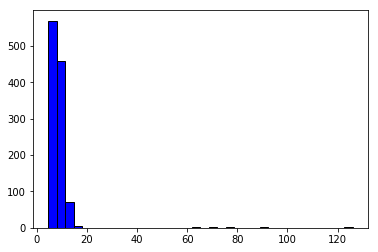

In [108]:
# Plot to see if we have outliers
plt.hist(train['fixed acidity'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

From the historgram of variable 'fixed aciditty', we can see that there are 5 data points that are far away from the distribution. You should try doing this for all variables and see if you find more outliers.

In [109]:
# Calculate the mean and standard deviation
mu = np.mean(train['fixed acidity'])
std = np.std(train['fixed acidity'])

# Normalize the data
normalized_data = (train['fixed acidity'] - mu)/std

# Find the data index that is 3 standard deviation away from the distribution
indexes = normalized_data < 3
train_cleaned = train.loc[indexes, :]

In [110]:
np.sum(-indexes) # See how many of them are outliers

5

In [111]:
train_cleaned.shape

(1104, 12)

d) Choose one variable that you think might have the biggest effects on the quality of wine. Fit a single linear regression model to that variable using Statsmodel. Plot a scatter plot of the dependent variable over the independent variable and also plot the fitted line on the same plot to see how well your model fits. Also add the R<sup>2</sup> score as the title of the plot.

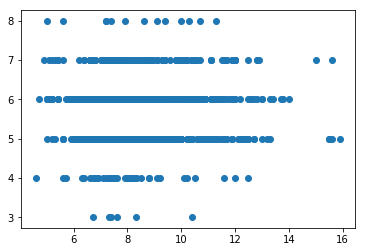

In [112]:
### YOUR CODE for d) GOES HERE

plt.scatter(train_cleaned['fixed acidity'], train_cleaned['quality']) # Seems like there is a upwarding trend

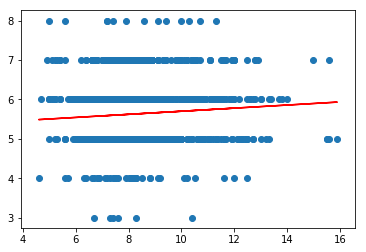

In [113]:
X = train_cleaned['fixed acidity'].values
y = train_cleaned['quality'].values

# Plot the linear regression model that you found from Q1
(B0, B1) = estimate_coef_OLS(X, y)

predict = B1 * X + B0
plt.plot(X, predict, c='red')
plt.scatter(X, y)

In [115]:
# Fit it using Statsmodel
import statsmodels.api as sm
heights_constant_added = sm.add_constant(X)
results = sm.OLS(y, heights_constant_added).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.048
Date:                Wed, 05 Feb 2020   Prob (F-statistic):            0.00464
Time:                        14:10:09   Log-Likelihood:                -1323.8
No. Observations:                1104   AIC:                             2652.
Df Residuals:                    1102   BIC:                             2662.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3065      0.118     45.102      0.000       5.076       5.537
x1             0.0392      0.014      2.837      0.005       0.012       0.066
==============================================================================
Omnibus:                       13.085   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.501
Skew:                           0.236   Prob(JB):                      0.00117
Kurtosis:                       3.266   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
results.params

array([5.30650281, 0.03922564])

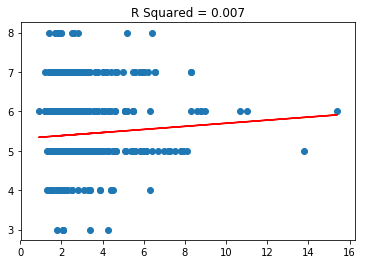

In [133]:
B1 = results.params[1]
B0 = results.params[0]

predict = B1 * X + B0
plt.plot(X, predict, c='red')
plt.title('R Squared = 0.007')
plt.scatter(X, y)

e) Make predictions on the testing set using your model created in d), create a submission and submit it to kaggle. 

In [118]:
### YOUR CODE for e) GOES HERE
X_test = test['fixed acidity']
y_pred = B1*X_test + B0

In [119]:
# Create submission
# Read in sample submissions
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,Id,Predicted
0,0,2.0
1,1,6.0
2,2,1.0
3,3,4.0
4,4,2.0


In [120]:
sample_submission.loc[:, 'Predicted'] = y_pred # Change the Predicted column to your prediction
sample_submission.head()

,Id,Predicted
0,0,5.683069
1,1,5.604618
2,2,5.643843
3,3,5.698759
4,4,5.534012


In [121]:
sample_submission.to_csv('first_submission.csv', header=True, index=False)

In [122]:
### Report the score of your first submission on Kaggle here
# The score for this submission is 34.22685

f) Try to fit the regression model using a different variable. Create another submission and submit it to kaggle. Discuss why that variable was better, worse, or roughly the same as the previous variable that you fit.

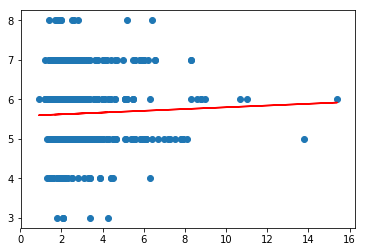

In [123]:
### YOUR CODE for f) GOES HERE
X = train_cleaned['residual sugar'].values
y = train_cleaned['quality'].values

# Plot the linear regression model that you found from Q1
(B0, B1) = estimate_coef_OLS(X, y)

predict = B1 * X + B0
plt.plot(X, predict, c='red')
plt.scatter(X, y)


In [124]:
X_test = test['residual sugar']
y_pred = B1*X_test + B0

In [125]:
### Report the score of your second submission on Kaggle here

In [126]:
# Create submission
# Read in sample submissions
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:, 'Predicted'] = y_pred # Change the Predicted column to your prediction
sample_submission.to_csv('second_submission.csv', header=True, index=False)
# The score for this submission is 34.28976

In [1]:
### Discussion
# The first variable fixed acidity is better. A valid hypothesis is that red wine quality depends more on the acidity of the wine rather than sugar.
# However, this is not a huge difference though.